In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-img/poak_testimg.jpeg
/kaggle/input/validation-dataset/Validation_data/Other/v_random2.jpeg
/kaggle/input/validation-dataset/Validation_data/Other/v_random3.jpeg
/kaggle/input/validation-dataset/Validation_data/Other/v_random5.jpeg
/kaggle/input/validation-dataset/Validation_data/Other/v_random8.jpeg
/kaggle/input/validation-dataset/Validation_data/Other/v_random9.jpeg
/kaggle/input/validation-dataset/Validation_data/Other/v_random1.jpeg
/kaggle/input/validation-dataset/Validation_data/Other/v_random10.jpeg
/kaggle/input/validation-dataset/Validation_data/Other/v_random4.jpeg
/kaggle/input/validation-dataset/Validation_data/Other/v_random6.jpeg
/kaggle/input/validation-dataset/Validation_data/Other/v_random7.jpeg
/kaggle/input/validation-dataset/Validation_data/Poison Ivy/p-ivy.2.jpeg
/kaggle/input/validation-dataset/Validation_data/Poison Ivy/p-ivy.1.jpeg
/kaggle/input/validation-dataset/Validation_data/Poison Ivy/p-ivy.4.jpeg
/kaggle/input/validation-dataset/Valida

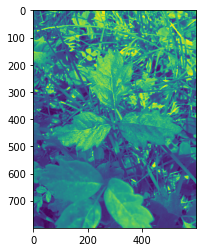

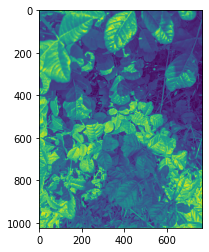

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "../input/trainingset/plant-detection-data"
VALDATA = "../input/validation-dataset/Validation_data"
CATEGORIES = [ "Poison Oak", 
              "Poison Ivy",
              "Other"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        break
    break
    
for category in CATEGORIES:
    path2 = os.path.join(VALDATA, category)
    for img in os.listdir(path2):
        img_array2 = cv2.imread(os.path.join(path2, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array2)
        plt.show()
        break
    break

In [3]:
print(img_array.shape)
print(img_array2.shape)

(800, 600)
(1024, 768)


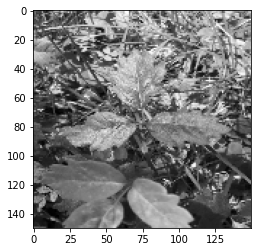

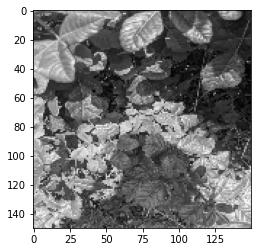

In [4]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

new_array2 = cv2.resize(img_array2, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array2, cmap = 'gray')
plt.show()

In [5]:
print(new_array.shape)
print(new_array2.shape)

(150, 150)
(150, 150)


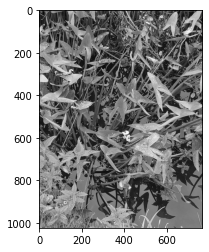

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                plt.imshow(img_array, cmap ='gray')
                plt.show
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

val_data = []

def create_val_data():
    for category in CATEGORIES:
        path2 = os.path.join(VALDATA, category)
        class_num2 = CATEGORIES.index(category)
        for img in os.listdir(path2):
            try:
                img_array2 = cv2.imread(os.path.join(path2, img), cv2.IMREAD_GRAYSCALE)
                new_array2 = cv2.resize(img_array2, (IMG_SIZE, IMG_SIZE))
                plt.imshow(img_array2, cmap ='gray')
                plt.show
                val_data.append([new_array2, class_num2])
            except Exception as e:
                pass
create_val_data()

In [7]:
print(len(training_data))
print(len(val_data))

30
30


In [8]:
import random

random.shuffle(training_data)
random.shuffle(val_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])
    
for sample in val_data[:10]:
    print(sample[1])

1
1
1
2
0
0
2
0
2
1
0
0
2
1
2
1
0
1
1
2


In [10]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

x_val = []
y_val = []
for features, label in val_data:
    x_val.append(features)
    y_val.append(label)
    
x_val = np.array(x_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)
valid_set = (x_val, y_val)
#y = np.array(y).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#print(X)
print(valid_set)

(array([[[[ 20],
         [ 24],
         [ 67],
         ...,
         [ 65],
         [ 49],
         [ 54]],

        [[ 21],
         [ 48],
         [ 28],
         ...,
         [ 51],
         [ 44],
         [ 44]],

        [[238],
         [192],
         [ 96],
         ...,
         [ 47],
         [ 39],
         [175]],

        ...,

        [[ 43],
         [ 38],
         [170],
         ...,
         [ 29],
         [146],
         [109]],

        [[ 60],
         [121],
         [148],
         ...,
         [ 80],
         [131],
         [121]],

        [[113],
         [ 65],
         [114],
         ...,
         [141],
         [135],
         [164]]],


       [[[ 79],
         [ 76],
         [ 74],
         ...,
         [148],
         [144],
         [134]],

        [[ 85],
         [ 79],
         [ 60],
         ...,
         [138],
         [134],
         [124]],

        [[ 87],
         [ 92],
         [ 88],
         ...,
         [126],
         

In [11]:
import pickle #saving dataset

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [13]:
x_val[1]

array([[[ 79],
        [ 76],
        [ 74],
        ...,
        [148],
        [144],
        [134]],

       [[ 85],
        [ 79],
        [ 60],
        ...,
        [138],
        [134],
        [124]],

       [[ 87],
        [ 92],
        [ 88],
        ...,
        [126],
        [166],
        [159]],

       ...,

       [[182],
        [208],
        [187],
        ...,
        [ 78],
        [ 78],
        [ 65]],

       [[198],
        [250],
        [255],
        ...,
        [ 67],
        [ 49],
        [ 38]],

       [[183],
        [179],
        [168],
        ...,
        [ 50],
        [ 73],
        [ 94]]], dtype=uint8)

In [14]:
#creating our convolutional neural network
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

#normalize data
X = X/225.0

#building model

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

learning_rate= 0.01

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.fit(X, y, batch_size=2, epochs=15, validation_data=valid_set)

model.save('PlantCNN.model')

Epoch 1/15
15/15 [==============================] - 2s 117ms/step - loss: 0.0000e+00 - accuracy: 0.3096 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 2/15
15/15 [==============================] - 1s 79ms/step - loss: 0.0000e+00 - accuracy: 0.2250 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 3/15
15/15 [==============================] - 1s 80ms/step - loss: 0.0000e+00 - accuracy: 0.2597 - val_loss: 0.0000e+00 - val_accuracy: 0.4333
Epoch 4/15
15/15 [==============================] - 1s 78ms/step - loss: 0.0000e+00 - accuracy: 0.4060 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 5/15
15/15 [==============================] - 1s 77ms/step - loss: 0.0000e+00 - accuracy: 0.3697 - val_loss: 0.0000e+00 - val_accuracy: 0.3667
Epoch 6/15
15/15 [==============================] - 1s 77ms/step - loss: 0.0000e+00 - accuracy: 0.2108 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 7/15
15/15 [==============================] - 1s 80ms/step - loss: 0.0000e+00 - accuracy: 0.4475 - 

In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.fit(X, y, batch_size=2, epochs=15, validation_data=valid_set)

Epoch 1/15
15/15 [==============================] - 2s 111ms/step - loss: 0.0000e+00 - accuracy: 0.3320 - val_loss: 0.0000e+00 - val_accuracy: 0.3667
Epoch 2/15
15/15 [==============================] - 1s 80ms/step - loss: 0.0000e+00 - accuracy: 0.5331 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 3/15
15/15 [==============================] - 1s 80ms/step - loss: 0.0000e+00 - accuracy: 0.6143 - val_loss: 0.0000e+00 - val_accuracy: 0.2667
Epoch 4/15
15/15 [==============================] - 1s 80ms/step - loss: 0.0000e+00 - accuracy: 0.4678 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 5/15
15/15 [==============================] - 1s 79ms/step - loss: 0.0000e+00 - accuracy: 0.5851 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 6/15
15/15 [==============================] - 1s 79ms/step - loss: 0.0000e+00 - accuracy: 0.3694 - val_loss: 0.0000e+00 - val_accuracy: 0.2667
Epoch 7/15
15/15 [==============================] - 1s 80ms/step - loss: 0.0000e+00 - accuracy: 0.5167 - 

In [16]:
import optuna
import sklearn
from sklearn import datasets
def objective(trial):
      iris = sklearn.datasets.load_iris()
      n_estimators = trial.suggest_int('n_estimators', 2, 20)
      max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
      clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
      return sklearn.model_selection.cross_val_score(clf, iris.data, iris.target, 
           n_jobs=-1, cv=3).mean()
    
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

print("Best hyperparameters: {}".format(trial.params))

[I 2022-07-07 19:25:53,490] A new study created in memory with name: no-name-e5392b13-4506-4d48-8ed4-f58502de2d54
[I 2022-07-07 19:25:55,131] Trial 0 finished with value: 0.96 and parameters: {'n_estimators': 11, 'max_depth': 11.997005919882138}. Best is trial 0 with value: 0.96.
[I 2022-07-07 19:25:55,859] Trial 1 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 14, 'max_depth': 10.705743776969454}. Best is trial 1 with value: 0.9666666666666667.
[I 2022-07-07 19:25:55,892] Trial 2 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 6, 'max_depth': 10.636029930270103}. Best is trial 1 with value: 0.9666666666666667.
[I 2022-07-07 19:25:55,926] Trial 3 finished with value: 0.96 and parameters: {'n_estimators': 6, 'max_depth': 15.00074131047828}. Best is trial 1 with value: 0.9666666666666667.
[I 2022-07-07 19:25:55,976] Trial 4 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 14, 'max_depth': 16.592394178709966}. Best

Accuracy: 0.9733333333333333
Best hyperparameters: {'n_estimators': 15, 'max_depth': 22.757785677697495}


In [17]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def objective(trial):
    X, y = make_classification(n_features=10, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    C = trial.suggest_loguniform("C", 1e-7, 10.0)

    clf = LogisticRegression(C=C)
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

print(study.best_trial.value)  # Show the best value.

[I 2022-07-07 19:26:01,862] A new study created in memory with name: no-name-722367bc-706b-42c3-927f-852879e1367f
[I 2022-07-07 19:26:02,007] Trial 0 finished with value: 0.44 and parameters: {'C': 1.142440038593868e-06}. Best is trial 0 with value: 0.44.
[I 2022-07-07 19:26:02,016] Trial 1 finished with value: 0.44 and parameters: {'C': 0.0002722389660000523}. Best is trial 0 with value: 0.44.
[I 2022-07-07 19:26:02,022] Trial 2 finished with value: 0.92 and parameters: {'C': 0.14531326553031323}. Best is trial 2 with value: 0.92.
[I 2022-07-07 19:26:02,030] Trial 3 finished with value: 0.44 and parameters: {'C': 6.294522842655037e-07}. Best is trial 2 with value: 0.92.
[I 2022-07-07 19:26:02,036] Trial 4 finished with value: 0.44 and parameters: {'C': 0.00011214447981547465}. Best is trial 2 with value: 0.92.
[I 2022-07-07 19:26:02,043] Trial 5 finished with value: 0.44 and parameters: {'C': 2.753278025449556e-07}. Best is trial 2 with value: 0.92.
[I 2022-07-07 19:26:02,049] Trial 6

0.92


In [18]:
import cv2
import tensorflow as tf

CATEGORIES = ["Poison Oak",
              "Poison Ivy",
              "Other"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("PlantCNN.model")

prediction = model.predict([prepare('../input/trainingset/plant-detection-data/Poison Ivy/poisonivy_3 copy.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[1.]]
Poison Ivy
